## Исследовательский анализ данных (просмотреть рапределение данных)

In [3]:
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns 
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [4]:
# путь к каталогу csv-файлов
path = '/datasets/final_provider/'

# берем все csv-файлы в этом каталоге 
csvfiles = glob.glob(os.path.join(path, '*.csv'))

# в одну талицу на будуещее
dataframes = []

# имена будующх таблиц
file_list = ['internet', 'phone', 'personal', 'contract']

# сделаем 2 варианта: объединим, оставим каждую отдельно.
for csvfile in csvfiles:
    for file in file_list:
        if file in os.path.abspath(csvfile):
            file = pd.read_csv(csvfile, index_col = ['customerID'])
            dataframes.append(file)
            file = file.reset_index()
            display(file.head())
            
# все данные в одну талицу 
data = pd.concat(dataframes, ignore_index = False, sort = True, axis=1)
data = data.reset_index()
data.rename({'index':'customerID'}, axis = 1, inplace = True)

data.info()
display(data.head(15))

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
MultipleLines       6361 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 1.1+ MB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,DSL,No,Yes,No,Yes,Yes,No,No,Female,0,Yes,Yes,2019-05-01,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,DSL,No,No,No,No,No,Yes,Yes,Male,0,No,No,2019-05-01,No,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Fiber optic,No,No,Yes,No,No,No,No,Male,0,No,No,2019-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Fiber optic,No,Yes,Yes,No,Yes,Yes,No,Male,1,Yes,No,2018-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Fiber optic,No,No,No,Yes,Yes,No,No,Female,1,Yes,No,2019-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,DSL,No,No,No,Yes,Yes,Yes,No,Female,0,No,Yes,2019-05-01,No,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,No,Female,1,Yes,No,2014-03-01,No,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,Fiber optic,Yes,No,No,Yes,No,No,Yes,Male,0,Yes,No,2014-11-01,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,DSL,Yes,No,No,No,No,No,No,Female,1,No,No,2019-07-01,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Female,0,Yes,Yes,2014-09-01,No,Two year,Yes,Mailed check,90.45,5957.9


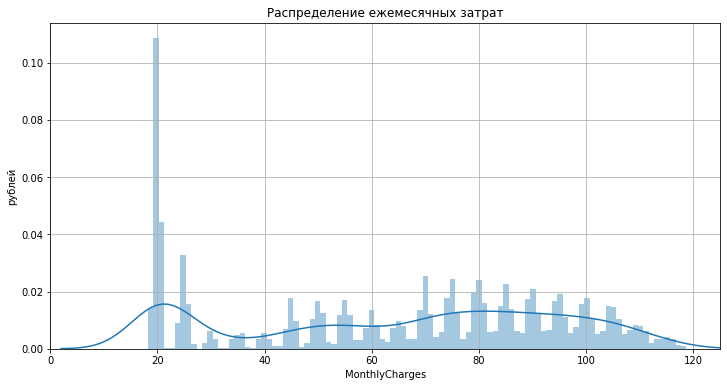

Количество дубликатов: 0
Средние расходы : 64.76169246059918
Медианные расходы: 70.35


In [5]:
def supergist(column, x):
    fig = plt.figure(figsize=(12, 6))
    plt.title('Распределение ежемесячных затрат')
    plt.xlim([0, x])
    fig = sns.distplot(data[column], bins = 100)
    plt.xlabel(column)
    plt.ylabel('рублей')
    fig.grid(True)
    plt.show()

supergist('MonthlyCharges', 125)
print('Количество дубликатов:',data.duplicated().sum())
print('Средние расходы :',data['MonthlyCharges'].mean())
print('Медианные расходы:',data['MonthlyCharges'].median())

In [6]:
result_0 = data.loc[data['EndDate'] == 'No', 'EndDate'].count()
percent_0 = result_0 / len(data)
percent_1 = 1 - percent_0
print('процент отрицательных ответов = {:0.1%}'.format(percent_0))
print('процент положительных ответов = {:0.1%}'.format(percent_1))

процент отрицательных ответов = 73.5%
процент положительных ответов = 26.5%


<h3>Вывод</h3>
Объединив все таблицы в одну, мы получили таблицу с 20 столбцами и 7043 строками. Имеем пропуски во многих столбцах, а также неправильные типы данных (самое банальная ошибка object в столбце TotalCharges).Похоже придется применить One-Hot Encoding, чтобы обработать данные типа object. Предполижительно обучение бустинга регресии (интересно вдруг все очень просто), возможно обучение нейронки. В качестве функции потерь использум AUC-ROC. Интересным смотрится добавить столбцы с количеством дней существования аккаунта абонента с помощью разницы между "актуальной датой" и днем регистрации. дисбаланс классов наблюдается значительный (один класс в 3 раза превышает другой): оставшихся `73.5%`, ушедших: `26.5%`.

## Создание новых фитч

In [7]:
# добавим фитчу с количеством дней пользования (если еще пользуется: разница с 1 фераля 2020)
data_res = data.loc[:,['BeginDate','EndDate']]
data_res['EndDate'] = data['EndDate'].replace('No', '2020-02-01 00:00:00')

# переводим в datetime64
data_res['BeginDate'] = pd.to_datetime(data_res['BeginDate'], format = '%Y-%m-%d')
data_res['EndDate'] = pd.to_datetime(data_res['EndDate'], format = '%Y-%m-%d')

# считаем разницу в днях 
data_res['count_days'] = data_res['EndDate'] - data_res['BeginDate']
data_res['count_days'] = data_res['count_days'] / np.timedelta64(1, 'D')
data_res['count_days'] = data_res['count_days'].astype(int)

data_res.info()
display(data_res.head())

# присваиваем общей таблице вмессто даты начала пользования 
data['BeginDate'] = data_res.loc[:, 'count_days']

data.rename({'BeginDate' : 'number_of_days'}, axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
BeginDate     7043 non-null datetime64[ns]
EndDate       7043 non-null datetime64[ns]
count_days    7043 non-null int64
dtypes: datetime64[ns](2), int64(1)
memory usage: 165.2 KB


,BeginDate,EndDate,count_days
0,2019-05-01,2020-02-01,276
1,2019-05-01,2020-02-01,276
2,2019-09-01,2020-01-01,122
3,2018-12-01,2020-01-01,396
4,2019-09-01,2019-12-01,91


### Вывод
Произвел вычисления количества дней в отдельной таблице (дабы не накосячить в основной). Для актуальных абонентов использовал в качестве конечной - "Актуальную дату" `2020-02-01 00:00:00`. Поменял название столбца на `number_of_days`

## Обработка данных

In [8]:
# дропнем стобец Id заменим все Nan на 'propusk'
data = data.drop('customerID', axis = 1)
data = data.fillna('propusk')

In [9]:
data.rename({'EndDate' : 'subscriber_left'}, axis = 1, inplace = True)

In [10]:
display(data[data['TotalCharges'] == ' '])

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,gender,SeniorCitizen,Partner,Dependents,number_of_days,subscriber_left,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
945,DSL,Yes,Yes,Yes,Yes,Yes,No,propusk,Female,0,Yes,Yes,0,No,Two year,No,Credit card (automatic),56.05,
1731,propusk,propusk,propusk,propusk,propusk,propusk,propusk,No,Female,0,Yes,Yes,0,No,Two year,No,Mailed check,20.00,
1906,DSL,Yes,Yes,No,Yes,No,No,Yes,Male,0,No,Yes,0,No,Two year,Yes,Bank transfer (automatic),61.90,
2025,propusk,propusk,propusk,propusk,propusk,propusk,propusk,No,Male,0,Yes,Yes,0,No,One year,Yes,Mailed check,19.70,
2176,propusk,propusk,propusk,propusk,propusk,propusk,propusk,No,Male,0,No,Yes,0,No,Two year,No,Mailed check,20.25,
2250,propusk,propusk,propusk,propusk,propusk,propusk,propusk,Yes,Male,0,Yes,Yes,0,No,Two year,No,Mailed check,25.35,
2855,DSL,No,Yes,Yes,Yes,Yes,No,Yes,Female,0,Yes,Yes,0,No,Two year,No,Mailed check,73.35,
3052,propusk,propusk,propusk,propusk,propusk,propusk,propusk,Yes,Male,0,Yes,Yes,0,No,Two year,No,Mailed check,25.75,
3118,DSL,Yes,No,Yes,Yes,Yes,No,propusk,Female,0,Yes,Yes,0,No,Two year,Yes,Bank transfer (automatic),52.55,
4054,DSL,Yes,Yes,Yes,No,Yes,Yes,No,Female,0,Yes,Yes,0,No,Two year,No,Mailed check,80.85,


In [11]:
# редактируем target 
data['subscriber_left'] = data['subscriber_left'].replace('No', '0')
data.loc[data['subscriber_left'] != '0','subscriber_left'] = '1'

# избавимся от пропусков 
data.replace({'TotalCharges': ' '}, 0, regex = True, inplace = True)
print(data.isna().sum())

# так как значений всего 11 заполним медианой 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], downcast = 'float')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# поменяем типы данных на подходящие 
data['SeniorCitizen'] = data['SeniorCitizen'].astype('str')
data['TotalCharges'] = data['TotalCharges'].astype(int)
data['MonthlyCharges'] = data['MonthlyCharges'].astype(int)

print(data.info())

InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
number_of_days      0
subscriber_left     0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents 

In [12]:
# соберем все категориальные фитчи 
category_features_list = []
for column in data.columns:
    if data[column].dtype == 'object' and column != 'subscriber_left':
        data[column] = data[column].astype('str')
        category_features_list.append(column)
               
data.info()

# для удобства 
data['subscriber_left'] = data['subscriber_left'].astype('int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
MultipleLines       7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
number_of_days      7043 non-null int64
subscriber_left     7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null int64
TotalCharges        7043 non-null int64
dtypes: int64(3), object(16)
memory usage: 1.0+ MB


### Вывод 
Заполнил все пропуски, заменили `Nan` на `propusk`, чтобы у модели точно не было вопросов. Аномальные 11 пропусков в столбце `TotalCharges`, были заменны на `0`, поскольку это те абоненты у которых 0 дней пользования аккаунтом. Так же собрали все категориальные переменные в список для дальнейшей работы с градиентныйм бустингом.

## Разделение на выборки (train и test)

In [13]:
features = data.drop('subscriber_left', axis = 1)
target = data['subscriber_left']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.25, random_state = 12345)

In [14]:
# стандартизируем данные
numeric = features.select_dtypes(include = 'int64').columns.tolist()

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train.numeric = scaler.transform(features_train[numeric])
features_test.numeric = scaler.transform(features_test[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


### Вывод 
Разделили в стандартном отношениии данные, и стандартизировали категориальные признаки

## Обучение моделей 

In [15]:
%%time
# обучим CatBoost
model_cbc = CatBoostClassifier(iterations = 1600,
                           depth = 2,
                           learning_rate = 1,
                           loss_function = 'Logloss',
                           early_stopping_rounds = 50,
                           eval_metric = 'AUC',    
                           verbose = True)

model_cbc.fit(features_train, target_train, cat_features = category_features_list, verbose = 200)
print(model_cbc.score(features_train, target_train))

0:	total: 56.3ms	remaining: 1m 30s
200:	total: 5.28s	remaining: 36.8s
400:	total: 10.6s	remaining: 31.8s
600:	total: 16.2s	remaining: 27s
800:	total: 22s	remaining: 22s
1000:	total: 27.5s	remaining: 16.4s
1200:	total: 32.9s	remaining: 10.9s
1400:	total: 38.4s	remaining: 5.45s
1599:	total: 44.1s	remaining: 0us
0.9399848542218856
CPU times: user 37.6 s, sys: 7.88 s, total: 45.4 s
Wall time: 50.7 s


### Вывод 
Взял модель CatBoostClassifier, сильного представителя градиентного бустинга (лучше наверное только нейронки, но это долго и затратно по мощности), без определнного подбора гиперпарамеетров модель сходу дает необходимые `0.88` точности по метрике 
`AUC-ROC`

## Проверка моделей 

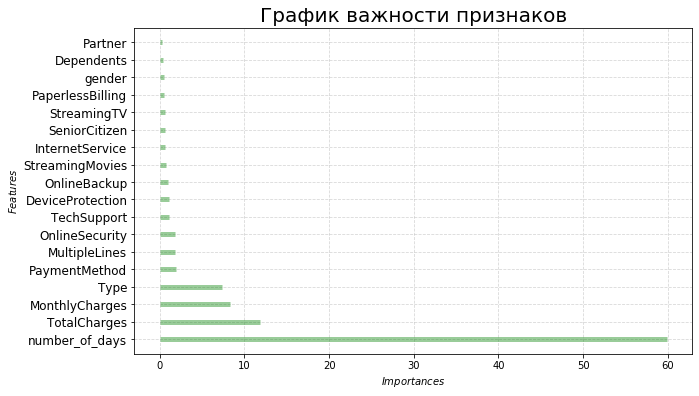

In [16]:
# построим график важности фитчей 
feature_importance = model_cbc.get_feature_importance(prettified = True)

plt.figure(figsize = (10,6))
plt.hlines(y = feature_importance['Feature Id'], xmin = 0,
           xmax = feature_importance['Importances'], color = 'green', alpha = 0.4, linewidth=5)
plt.gca().set(ylabel='$Features$', xlabel='$Importances$')
plt.title('График важности признаков', fontdict={'size':20})
plt.yticks(feature_importance.index, feature_importance['Feature Id'], fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [17]:
# проверим AUC-ROC и accuracy на тестовой выборке
predicted = model_cbc.predict_proba(features_test)
predicted_1 = predicted[:,1]

predicted_ac = model_cbc.predict(features_test)
predicted_ac = pd.Series(predicted_ac.astype('int'))

print('AUC-ROC =', roc_auc_score(target_test, predicted_1))
print('accuracy =', model_cbc.score(features_test, target_test))
print('f1_score =', f1_score(target_test, predicted_ac, average = 'weighted'))

tn, fp, fn, tp = confusion_matrix(target_test,predicted_ac).ravel()

print()
print('True Negative =', tn)
print('False Positive =', fp)
print('False Negative =', fn)
print('True Positive =', tp)

display(confusion_matrix(target_test,predicted_ac))

AUC-ROC = 0.9297497880269582
accuracy = 0.8847245883021011
f1_score = 0.8841809074055442

True Negative = 1208
False Positive = 95
False Negative = 108
True Positive = 350


array([[1208,   95],
       [ 108,  350]])

In [18]:
# константная модель
target_pred_constant = pd.Series(0, index = target_test.index)

print('AUC-ROC константной модели =', roc_auc_score(target_test, target_pred_constant))
print('accuracy константной модели =', accuracy_score(target_test, target_pred_constant))
print('f1_score константной модели =', f1_score(target_test, target_pred_constant))

AUC-ROC константной модели = 0.5
accuracy константной модели = 0.7399204997160704
f1_score константной модели = 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Вывод 
Проверку на адекватность модель прошла успешно, необходимое значение точности по метрике `AUC-ROC` было получено. Модель писсиместична): дает много отрицательных ответов.
Так же был построен график важности признаков. самым важным оказался признак `number_of_days`, в этом рейтинге в ним не может сравниться никто, что оправдывает его добавление.

## Общий вывод

Получив несколько разных датасетов, объединил и в один для дальнешей реализации плана работы:<br>
    <p>1) Исследовательский анализ данных (просмотрел рапределение данных, определил дисбаланс классов)</p>
    <p>2) Создание новых фитч (создатл новую фитчу `number_of_days`, для улучшения качества прогноза)</p>
    <p>3) Обработка данных (привел к должному столбцы с типом object, избавился от пропусков и `Nan`)</p>
    <p>4) Разделение на выборки (поделил на train и test, применив стандартизацию, для численных фитчей)</p>
    <p>5) Обучение моделей (обучил разные модели, посмотрел на итоговое качество AUC-ROC)</p>
    <p>6) Проверка моделей (проверил модели на адекватность и на удовлетворение условию)</p>
 <p>В ходе анализа выявил и обучил модель подходящую для решения этой задачи: `CatBoostClassifier`. Она показала достойный результат, несмотря на явный дисбаланс классов.</p>